# TF2 Fashion MNIST - POOLING

In [1]:
import numpy as np
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.5)
import tensorflow as tf
import matplotlib.pyplot as plt

for gpu in tf.config.list_physical_devices('GPU'):
    tf.config.experimental.set_memory_growth(gpu, True)
    
tf_version = 'TF ' + tf.__version__
print(tf_version)

TF 2.4.1


In [2]:
mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_val, y_val) = mnist.load_data()
X_train = X_train.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)

print("Training   X:", X_train.shape, 'y:', y_train.shape)
print("Validation X:", X_val.shape, 'y:', y_val.shape)
print("X min:", np.min(X_train))
print("X max:", np.max(X_train))

X_train, X_val = X_train/255.0, X_val/255.0

print("After normalization:")
print("X min:", np.min(X_train))
print("X max:", np.max(X_train))

Training   X: (60000, 28, 28, 1) y: (60000,)
Validation X: (10000, 28, 28, 1) y: (10000,)
X min: 0
X max: 255
After normalization:
X min: 0.0
X max: 1.0


In [3]:
def getModelCNN():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax')], name='CNN')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

def getModelCNNPooling():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(8, (3, 3), strides=2, activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(128, (3, 3), strides=2, activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax')], name='CNNPooling')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

def getModelMaxPooling():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax')], name='MaxPooling')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

def getModelAvgPooling():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.AvgPool2D(),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.AvgPool2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax')], name='AvgPooling')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

def getModelGlobalMaxPooling():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.GlobalMaxPooling2D(),
        tf.keras.layers.Dense(10, activation='softmax')], name='GlobalMaxPooling')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

def getModelGlobalAveragePooling():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(10, activation='softmax')], name='GlobalAveragePooling')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [4]:
def vizualize_results(models, histories):
    plt.figure(figsize=(20,10))
    ax1=plt.subplot(121)
    
    srtd = sorted(zip(models, histories), key=lambda x: max(x[1].history['val_accuracy']))[::-1]
    for name, history in srtd:
        plt.plot(history.history['accuracy'], label=name+' %.1f%%'%(100*max(history.history['val_accuracy'])))
        plt.title('Training accuracy')
        plt.legend()
    plt.subplot(122, sharey=ax1)
    for name, history in srtd:
        plt.plot(history.history['val_accuracy'], label=name+' %.1f%%'%(100*max(history.history['val_accuracy'])))
        plt.title('Validation accuracy')
        plt.legend();

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       9344      
_________________________________________________________________
flatten (Flatten)            (None, 73728)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                737290    
Total params: 746,714
Trainable params: 746,714
Non-trainable params: 0
_________________________________________________________________
CNN
Model: "CNNPooling"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 13, 13, 8)         80        
_________________________________

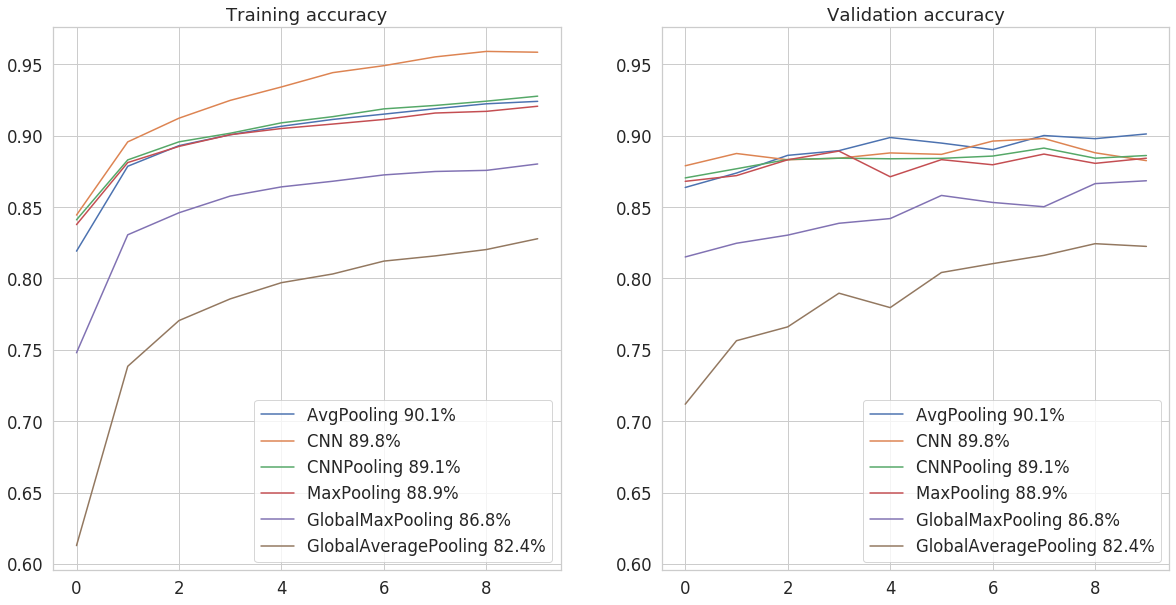

In [5]:
epochs=10
batch_size=128
histories = []
models=[getModelCNN, getModelCNNPooling, getModelMaxPooling, getModelAvgPooling, getModelGlobalMaxPooling, getModelGlobalAveragePooling]
model_names=[]
for m in models:
    model=m()
    model.summary()
    model_names.append(model.name)
    print(model.name)
    history = model.fit(X_train,
                       y_train,
                       epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0)
    del model
    histories.append(history)
vizualize_results(model_names, histories)

Model: "GlobalAveragePoolingNoDense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 128)       9344      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 10)        11530     
_________________________________________________________________
global_average_pooling2d_1 ( (None, 10)                0         
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 20,954
Trainable params: 20,954
Non-trainable params: 0
_________________________________________________________________


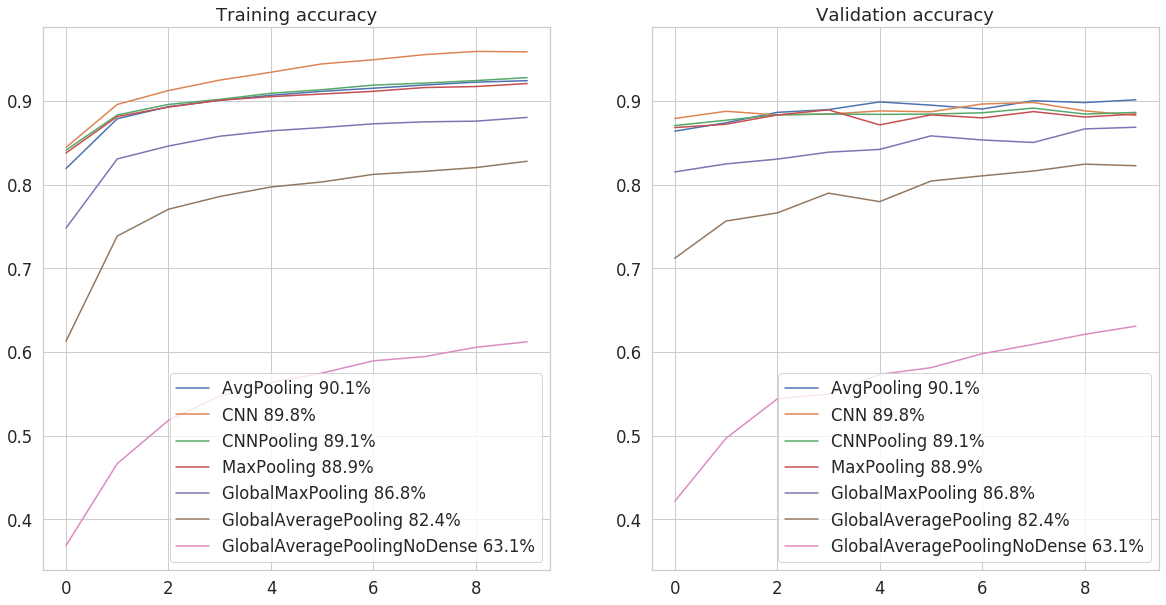

In [6]:
def getModelGlobalAveragePoolingNoDense():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(10, (3, 3), activation='softmax'),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Activation('softmax')], name='GlobalAveragePoolingNoDense')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

model = getModelGlobalAveragePoolingNoDense()
model.summary()
model_names.append(model.name)
history = model.fit(X_train,
                       y_train,
                       epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0)
del model
histories.append(history)
vizualize_results(model_names, histories)

# Pytorch

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.5)
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from tqdm import tqdm

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 8, 3),
            nn.ReLU(), 
            nn.Conv2d(8, 128, 3),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(73728, 10))
    
    def forward(self, x):
        x = self.model(x)
        output = F.log_softmax(x, dim=1)
        return output

class NetCNNPooling(nn.Module):
    def __init__(self):
        super(NetCNNPooling, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 8, 3, stride=2),
            nn.ReLU(), 
            nn.Conv2d(8, 128, 3, stride=2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(4608, 10))
    
    def forward(self, x):
        x = self.model(x)
        output = F.log_softmax(x, dim=1)
        return output
    
class NetMaxPooling(nn.Module):
    def __init__(self):
        super(NetMaxPooling, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 8, 3),
            nn.ReLU(), 
            nn.MaxPool2d(2),
            nn.Conv2d(8, 128, 3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(3200, 10))
    
    def forward(self, x):
        x = self.model(x)
        output = F.log_softmax(x, dim=1)
        return output
    
class NetAvgPooling(nn.Module):
    def __init__(self):
        super(NetAvgPooling, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 8, 3),
            nn.ReLU(), 
            nn.AvgPool2d(2),
            nn.Conv2d(8, 128, 3),
            nn.ReLU(),
            nn.AvgPool2d(2),
            nn.Flatten(),
            nn.Linear(3200, 10))
    
    def forward(self, x):
        x = self.model(x)
        output = F.log_softmax(x, dim=1)
        return output

class NetGlobalMaxPooling(nn.Module):
    def __init__(self):
        super(NetGlobalMaxPooling, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 8, 3),
            nn.ReLU(), 
            nn.Conv2d(8, 128, 3),
            nn.ReLU(),
            nn.AdaptiveMaxPool2d((1,1)),
            nn.Flatten(),
            nn.Linear(128, 10))
    
    def forward(self, x):
        x = self.model(x)
        output = F.log_softmax(x, dim=1)
        return output        
    
class NetGlobalAvgPooling(nn.Module):
    def __init__(self):
        super(NetGlobalAvgPooling, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 8, 3),
            nn.ReLU(), 
            nn.Conv2d(8, 128, 3),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1,1)),
            nn.Flatten(),
            nn.Linear(128, 10))
    
    def forward(self, x):
        x = self.model(x)
        output = F.log_softmax(x, dim=1)
        return output  
    
models = [Net, 
          NetCNNPooling, 
          NetMaxPooling, 
          NetAvgPooling, 
          NetGlobalMaxPooling, 
          NetGlobalAvgPooling]
# Check flattened vector size:
for m in models:
    model = m()
    x = torch.randn(1, 1, 28, 28)
    out = model(x)
    print('Params: %6d'%sum(p.numel() for p in model.parameters() if p.requires_grad), 
         model._get_name())
    del model

Params: 746714 Net
Params:  55514 NetCNNPooling
Params:  41434 NetMaxPooling
Params:  41434 NetAvgPooling
Params:  10714 NetGlobalMaxPooling
Params:  10714 NetGlobalAvgPooling


In [9]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

print(use_cuda, device)

epochs = 10
batch_size=64

transform = transforms.Compose([
    transforms.ToTensor()])

train_set = datasets.FashionMNIST('.', train=True, download=True, transform=transform)
val_set = datasets.FashionMNIST('.', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True)

True cuda


In [10]:
def train_model(model, optimizer, train_loader, val_loader, epochs, batch_size):
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []
    
    for epoch in tqdm(list(range(1, epochs+1))):
        model.train()
        train_loss=0
        correct=0
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()
            
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().detach()
            train_loss += loss.detach()
        train_loss /= len(train_loader)
        acc = correct/float(len(train_loader.dataset))
        train_losses.append(train_loss)
        train_accs.append(acc)

        model.eval()
        val_loss = 0
        correct = 0
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                val_loss += F.nll_loss(output, target, reduction='sum').detach()
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().detach()
        val_loss /= len(val_loader.dataset)
        val_acc = correct/float(len(val_loader.dataset))
        val_losses.append(val_loss)
        val_accs.append(val_acc)
    
    return train_losses, val_losses, train_accs, val_accs
    

In [11]:
results = []
model_names = []
for m in models:
    model = m().to(device)
    model_names.append(model._get_name())
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    train_losses, val_losses, train_accs, val_accs = train_model(model, optimizer, train_loader, val_loader, epochs, batch_size)
    results.append((train_losses, val_losses, train_accs, val_accs))

100%|██████████| 10/10 [00:57<00:00,  5.72s/it]


In [12]:
[len(_) for _ in results[0]]

[10, 10, 10, 10]

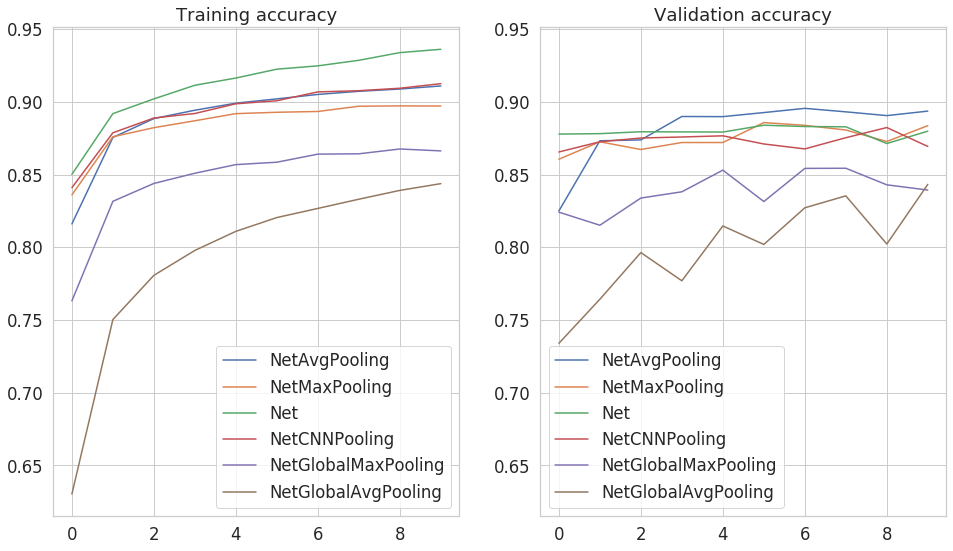

In [13]:
plt.figure(figsize=(16,9))
ax1=plt.subplot(121)
srtd = sorted(zip(model_names, results), key=lambda x: max(x[1][3]))[::-1]
for n, history in srtd:
    plt.plot(history[2], label=n)
    plt.title('Training accuracy')
    plt.legend();
plt.subplot(122, sharey=ax1)
for n, history in srtd:
    plt.plot(history[3], label=n)
    plt.title('Validation accuracy')
    plt.legend();

In [14]:
class NetGlobalAvgPoolingNoLinear(nn.Module):
    def __init__(self):
        super(NetGlobalAvgPoolingNoLinear, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 8, 3),
            nn.ReLU(), 
            nn.Conv2d(8, 128, 3),
            nn.ReLU(),
            nn.Conv2d(128, 10, 3),
            nn.AdaptiveAvgPool2d((1,1)),
            nn.Flatten())
    
    def forward(self, x):
        x = self.model(x)
        output = F.log_softmax(x, dim=1)
        return output  

In [15]:
model = NetGlobalAvgPoolingNoLinear().to(device)
model_names.append(model._get_name())
optimizer = optim.Adam(model.parameters(), lr=0.01)
train_losses, val_losses, train_accs, val_accs = train_model(model, optimizer, train_loader, val_loader, epochs, batch_size)
results.append((train_losses, val_losses, train_accs, val_accs))

100%|██████████| 10/10 [00:57<00:00,  5.78s/it]


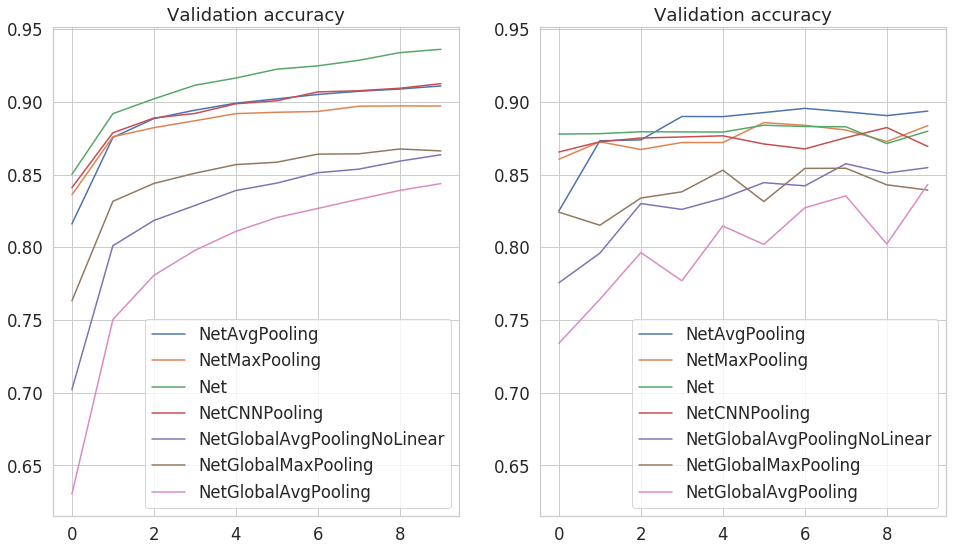

In [16]:
plt.figure(figsize=(16,9))
ax1=plt.subplot(121)
srtd = sorted(zip(model_names, results), key=lambda x: max(x[1][3]))[::-1]
for n, history in srtd:
    plt.plot(history[2], label=n)
    plt.title('Validation accuracy')
    plt.legend();
plt.subplot(122, sharey=ax1)
for n, history in srtd:
    plt.plot(history[3], label=n)
    plt.title('Validation accuracy')
    plt.legend();